#### Tarea 3


*   Evelyn Venegas Agustín
*   422068635
*   Introudcción a la ciencia de datos



Ejemplos de clase (quise guardarlos aquí como referencia)

In [2]:
ciudad_temperatura = {
'Madrid': 24.5,
'Buenos Aires': 19.2,
'CDMX': 21.7,
'Salina Cruz': 33.0,
}
print(ciudad_temperatura['Salina Cruz'])

33.0


In [3]:
ciudad_datos = {
  ('Madrid', 667, '2020-01-01','13:43'): 5.2,
  ('Madrid', 667, '2020-02-01'): 7.1,
  ('CDMX', 2240, '2020-01-01'): 13.4,
  ('CDMX', 2240, '2020-02-01'): 14.1,
}

#for clave, valor, fecha in ciudad_datos.items():
  #ciudad, altura, fecha = clave

#print(ciudad, altura, fecha, valor)
for clave, valor in ciudad_datos.items():
  if clave[0] == 'CDMX':
    print(clave, valor)

('CDMX', 2240, '2020-01-01') 13.4
('CDMX', 2240, '2020-02-01') 14.1


Ahora sí, primero abrimos el archivo usando el lector de pandas e imprimimos el dataset por columnas, más la información del archivo

In [4]:
import pandas as pd

df = pd.read_csv('/content/GLT_filtrado.csv', sep=',')
print(df.head())
print(df.info())

         Date  AverageTemperature  AverageTemperatureUncertainty     City  \
0  1849-01-01              26.704                          1.435  Abidjan   
1  1849-02-01              27.434                          1.362  Abidjan   
2  1849-03-01                 NaN                            NaN  Abidjan   
3  1849-04-01              26.140                          1.387  Abidjan   
4  1849-05-01              25.427                          1.200  Abidjan   

         Country Latitude Longitude  
0  Côte D'Ivoire    5.63N     3.23W  
1  Côte D'Ivoire    5.63N     3.23W  
2  Côte D'Ivoire    5.63N     3.23W  
3  Côte D'Ivoire    5.63N     3.23W  
4  Côte D'Ivoire    5.63N     3.23W  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219575 entries, 0 to 219574
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Date                           219575 non-null  object 
 1   AverageTemp

Vemos que tenemos un dataframe donde los datos de 2 columnas son float es decir decimales regulares: la temperatura y su incertidumbre. Los demás se reconocen automáticamente como objetos, entre fechas, strings para nombre de las ciudades y paises, y longitudes y latitudes. Además, contamos cuántas ciudades diferentes hay

In [5]:
#Cuantas ciudades distintas hay?
print(df['City'].unique())
print(df.City.nunique())

['Abidjan' 'Addis Abeba' 'Ahmadabad' 'Aleppo' 'Alexandria' 'Ankara'
 'Baghdad' 'Bangalore' 'Bangkok' 'Belo Horizonte' 'Berlin' 'Bogotá'
 'Bombay' 'Brasília' 'Cairo' 'Calcutta' 'Cali' 'Cape Town' 'Casablanca'
 'Changchun' 'Chengdu' 'Chicago' 'Chongqing' 'Dakar' 'Dalian'
 'Dar Es Salaam' 'Delhi' 'Dhaka' 'Durban' 'Faisalabad' 'Fortaleza' 'Gizeh'
 'Guangzhou' 'Harare' 'Harbin' 'Ho Chi Minh City' 'Hyderabad' 'Ibadan'
 'Istanbul' 'Izmir' 'Jaipur' 'Jakarta' 'Jiddah' 'Jinan' 'Kabul' 'Kano'
 'Kanpur' 'Karachi' 'Kiev' 'Kinshasa' 'Lagos' 'Lahore' 'Lakhnau' 'Lima'
 'London' 'Los Angeles' 'Luanda' 'Madras' 'Madrid' 'Manila' 'Mashhad'
 'Melbourne' 'Mexico' 'Mogadishu' 'Montreal' 'Moscow' 'Nagoya' 'Nagpur'
 'Nairobi' 'Nanjing' 'New Delhi' 'New York' 'Paris' 'Peking' 'Pune'
 'Rangoon' 'Rio De Janeiro' 'Riyadh' 'Rome' 'Saint Petersburg' 'Salvador'
 'Santiago' 'Santo Domingo' 'Seoul' 'Shanghai' 'Shenyang' 'Singapore'
 'Surabaya' 'Surat' 'Sydney' 'São Paulo' 'Taipei' 'Taiyuan' 'Tangshan'
 'Tianjin' 'Toky

Además veremos cuántos países hay

In [6]:
print(df['Country'].unique())
print(df.Country.nunique())

["Côte D'Ivoire" 'Ethiopia' 'India' 'Syria' 'Egypt' 'Turkey' 'Iraq'
 'Thailand' 'Brazil' 'Germany' 'Colombia' 'South Africa' 'Morocco' 'China'
 'United States' 'Senegal' 'Tanzania' 'Bangladesh' 'Pakistan' 'Zimbabwe'
 'Vietnam' 'Nigeria' 'Indonesia' 'Saudi Arabia' 'Afghanistan' 'Ukraine'
 'Congo (Democratic Republic Of The)' 'Peru' 'United Kingdom' 'Angola'
 'Spain' 'Philippines' 'Iran' 'Australia' 'Mexico' 'Somalia' 'Canada'
 'Russia' 'Japan' 'Kenya' 'France' 'Burma' 'Italy' 'Chile'
 'Dominican Republic' 'South Korea' 'Singapore' 'Taiwan' 'Sudan']
49


Lo cual me hace pensar que este dataset tiene un sesgo hacia Europa y Asia, pues solo hay seis paises americanos: EU, Canada, Mexico, Perú, Brasil y Chile, con pocas ciudades de cada uno.

In [8]:
#cuantas ciudades americanas hay?
print(df[df['Country'] == 'United States'].City.nunique())
print(df[df['Country'] == 'Canada'].City.nunique())
print(df[df['Country'] == 'Mexico'].City.nunique())
print(df[df['Country'] == 'Peru'].City.nunique())
print(df[df['Country'] == 'Brazil'].City.nunique())
print(df[df['Country'] == 'Chile'].City.nunique())


3
2
1
1
6
1


Es extraño que solo haya, por ejemplo 3 ciudades estadounidenses, pues abarca un territorio muy grande, así como canadá o méxico

Ahora veremos cuántos huecos hay en la temperatura promedio

In [7]:
#cuantos huecos hay en la temp promedio?
print(df.AverageTemperature.isna().sum())

27581


Para llenar los huecos, consideraré lo siguiente:

Si el hueco es de uno o dos espacios consecutivos, tomaré la media de temperaturas, sin embargo si el hueco es de 3 o más, no considero que sea realista, pues en promedio estaremos cambiando de estación, dado que una estación dura aproximadamente 3 meses. Así, si el hueco es mayor, lo que haré será tomar la temperatura de ese mismo mes un año antes, es decir 12 lugares antes

In [12]:
import numpy as np

def llenar_huecos(dataset):
  datos = np.array([float(x) if x != '' else np.nan for x in dataset])
  i = 0
  while i < len(datos):
    if np.isnan(datos[i]):
      #primero vamos a encontrar el tamaño del hueco
      inicio_hueco = i
      while i < len(datos) and np.isnan(datos[i]):
        i += 1
      final_hueco = i - 1
      tamaño_hueco =final_hueco - inicio_hueco + 1

      if tamaño_hueco <= 2:
        #si a lo más el hueco es de 2 meses, aplicaremos la tecnica del profesor
        previo = np.nan
        for j in range(inicio_hueco - 1, -1, -1):
          if not np.isnan(datos[j]):
            previo = datos[j]
            break

        siguiente = np.nan
        for j in range(final_hueco + 1, len(datos)):
          if not np.isnan(datos[j]):
            siguiente = datos[j]
            break

        if not np.isnan(previo) and not np.isnan(siguiente):
            fill_value = (previo + siguiente) / 2
        elif not np.isnan(previo):
            fill_value = previo
        elif not np.isnan(siguiente):
            fill_value = siguiente
        else:
            fill_value = np.nan

        for k in range(inicio_hueco, final_hueco + 1):
            datos[k] = fill_value

      else:
        #si tenemos el caso donde hay 3 huecos consecutivos o más, nos regresamos 1 año
        for k in range(inicio_hueco, final_hueco + 1):
          if k - 12 >= 0:
            datos[k] = datos[k - 12]
          else: #si 12 lugares antes también es NaN, aplicamos la misma técnica (recursivo)
            datos[k] = llenar_huecos([datos[k]])[0]

    else: #si no hay ningun problema, se sigue
      i += 1
  return datos.tolist()

In [14]:
df['AverageTemperature'] = llenar_huecos(df['AverageTemperature'].tolist())
print(df.AverageTemperature.isna().sum()) #verificamos que no hayan quedado huecos

0


Ahora, encontraremos las temperaturas más calientes y frías para cada ciudad indicada

In [17]:
ciudades = ['Rome', 'New York', 'Bangkok', 'Tokyo', 'Paris', 'Lima', 'Cairo', 'Moscow', 'Peking', 'Mexico']

def temperatura_fc(df, ciudad):
  df_ciudad = df[df['City'] == ciudad] #primero busca la ciudad solicitada en el data frame

  temp_fria = df_ciudad.loc[df_ciudad['AverageTemperature'].idxmin()]

  temp_caliente = df_ciudad.loc[df_ciudad['AverageTemperature'].idxmax()]

  return temp_fria, temp_caliente

#e imrimimos toda la inforación correspondiente de ese mes para cada ciudad
for ciudad in ciudades:
  fria, caliente = temperatura_fc(df, ciudad)
  print(f"Ciudad: {ciudad}")
  print("Temperatura más fría:")
  print(fria)
  print("Temperatura más caliente:")
  print(caliente)
  print("-" * 20)

Ciudad: Rome
Temperatura más fría:
Date                             1942-01-01
AverageTemperature                   -1.441
AverageTemperatureUncertainty          0.74
City                                   Rome
Country                               Italy
Latitude                             42.59N
Longitude                            13.09E
Name: 173003, dtype: object
Temperatura más caliente:
Date                             2003-08-01
AverageTemperature                   25.951
AverageTemperatureUncertainty         0.395
City                                   Rome
Country                               Italy
Latitude                             42.59N
Longitude                            13.09E
Name: 173742, dtype: object
--------------------
Ciudad: New York
Temperatura más fría:
Date                                1857-01-01
AverageTemperature                      -9.162
AverageTemperatureUncertainty             1.22
City                                  New York
Country            

En efecto, vemos la anomalía en Bangkok. 71 grados? está raro. Graficamos la distribucion de Roma y Bangkok

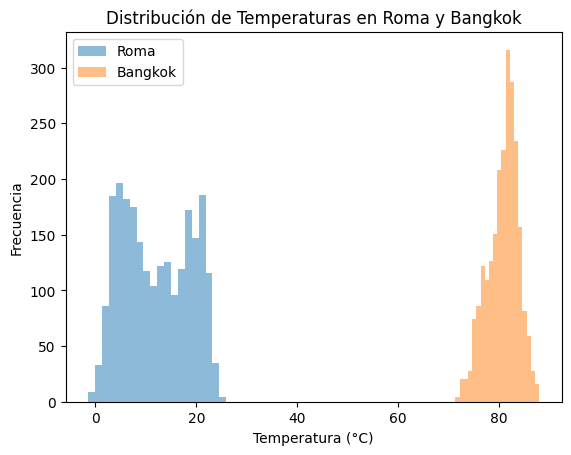

In [22]:
import matplotlib.pyplot as plt

df_roma=df[df['City']=='Rome']
df_bangkok=df[df['City']=='Bangkok']

temperaturas_roma=df_roma['AverageTemperature']
temperaturas_bangkok=df_bangkok['AverageTemperature']

plt.hist(temperaturas_roma, bins=20, alpha=0.5, label='Roma')
plt.hist(temperaturas_bangkok, bins=20, alpha=0.5, label='Bangkok')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Temperaturas en Roma y Bangkok')
plt.legend()
plt.show()

Para identificar si hay otras ciudades con este problema, filtraremos la temperatura máxima de cada una. Sabemos que incluso hasta la actualidad, más de 50 grados como promedio es improbable, así que aunque es un filtro algo inexacto, veremos si otras ciudades tienen este problema

In [25]:
todas_ciudades = df['City'].unique() #creamos un array con todas las ciudades del dataset
promedios_temp_altas=[]

for ciudad in todas_ciudades: #repetimos el ejercicio con los promedios mensuales más altos de todas las ciudades
  df_ciudad = df[df['City'] == ciudad]
  temp_alta = df_ciudad.loc[df_ciudad['AverageTemperature'].idxmax()]
  promedios_temp_altas.append(temp_alta)

promedios_temp_altas.sort(key=lambda x: x['AverageTemperature'], reverse=True) #ordenamos de mayor a menor

promedios_temp_altas


[Date                             2010-05-01
 AverageTemperature                   88.007
 AverageTemperatureUncertainty       32.5238
 City                                Bangkok
 Country                            Thailand
 Latitude                             13.66N
 Longitude                            99.91E
 Name: 20332, dtype: object,
 Date                             2000-07-01
 AverageTemperature                   38.283
 AverageTemperatureUncertainty         0.436
 City                                Baghdad
 Country                                Iraq
 Latitude                             32.95N
 Longitude                            45.00E
 Name: 15510, dtype: object,
 Date                               2012-07-01
 AverageTemperature                     37.859
 AverageTemperatureUncertainty            0.66
 City                                   Riyadh
 Country                          Saudi Arabia
 Latitude                               24.92N
 Longitude                    

Al parecer, Bangkok es la única ciudad en donde sucede esta anomalía,por lo que una posible explicación es que las temperaturas estuvieran registradas accidentalmente en Farenheit, ya que en el histograma vemos que están en un rango de 55-85 grados Farenheit (aprox 12°C-29°C) lo cual es más razonable. Otra posible explicación es que algo haya sucedido al transcribir los datos, un error sistemático en el cómputo de los mismos o en la recopilación, pero sin duda no representa la realidad

Ahora, calculemos todos los promedios anuales, y los promedios cada 5, 10, y 25 años de las ciudades en el array "ciudades" (menos bangkok para que no nos meta ruido)

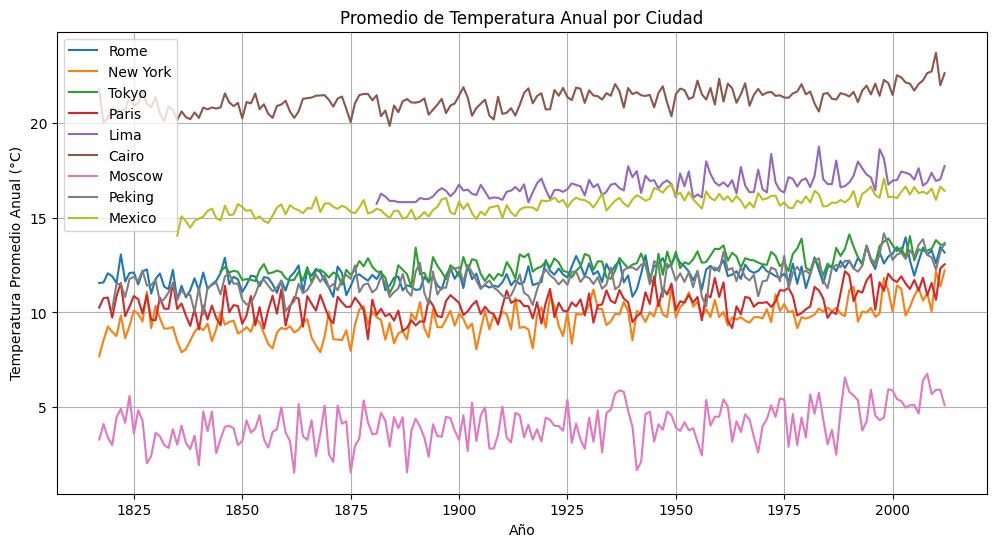

In [32]:
#hay un objeto llamado "datetime" que podemos usar ara interpretar fechas
df['Date'] = pd.to_datetime(df['Date'])

#de ahí extraemos el año
df['Year'] = df['Date'].dt.year

promedios_anuales = {}
ciudades= ['Rome', 'New York', 'Tokyo', 'Paris', 'Lima', 'Cairo', 'Moscow', 'Peking', 'Mexico']
for ciudad in ciudades:
  df_ciudad = df[df['City'] == ciudad]
  annual_avg_temp = df_ciudad.groupby('Year')['AverageTemperature'].mean()
  promedios_anuales[ciudad] = annual_avg_temp
#y graficamos
plt.figure(figsize=(12, 6))

for ciudad, promedio_anual in promedios_anuales.items():
  plt.plot(promedio_anual.index, promedio_anual.values, label=ciudad)


plt.xlabel('Año')
plt.ylabel('Temperatura Promedio Anual (°C)')
plt.title('Promedio de Temperatura Anual por Ciudad')
plt.legend()
plt.grid(True)
plt.show()

notamos que, pese que a partir de 1950 se observa un incremento en los promedios anuales, la tendencia no es tan evidente como si reducimos la escala. Es importante notar que en este caso sí es diferente si promediamos los años que acabamos de obtener que si lo hacemos por mes, ya que no sabemos si hay datos faltantes que se rellenaron, que hacen que algunos años estén "cargados", por lo que lo haremos cada 60 meses

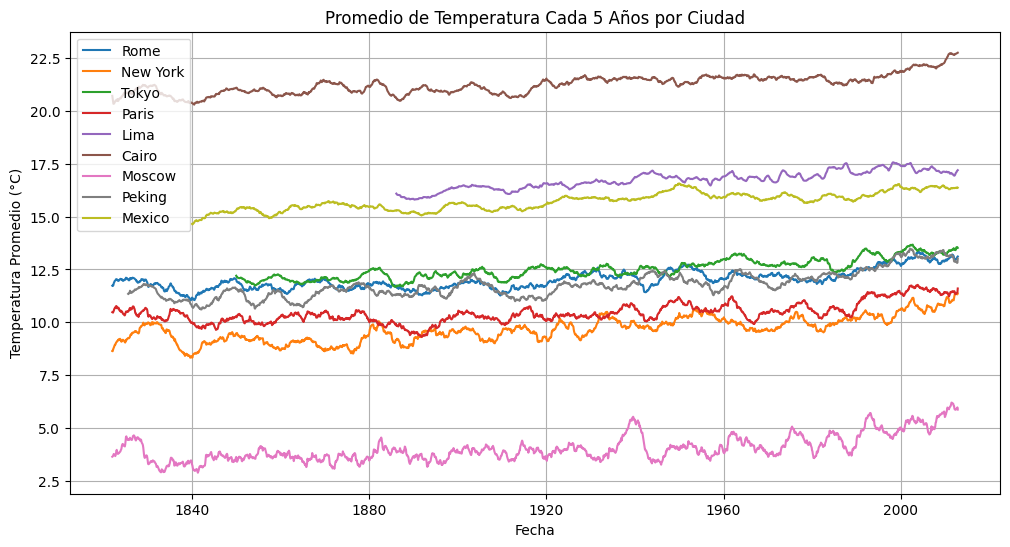

In [40]:

df['Date'] = pd.to_datetime(df['Date'])

promedios_cada_5_años = {}

for ciudad in ciudades:
  df_ciudad = df[df['City'] == ciudad].sort_values(by='Date').reset_index(drop=True)
  if not df_ciudad.empty:
    promedio_movil_60_meses = df_ciudad['AverageTemperature'].rolling(window=60).mean() #al parecer podemos hacer eficientemente los promedios de cada 60 meses
  #utilizando la función window, que solo sirve para objetos datetime-like. De la documentación: " This is only valid for datetimelike indexes"
    promedios_cada_5_años[ciudad] = pd.Series(promedio_movil_60_meses.values, index=df_ciudad['Date'])

plt.figure(figsize=(12, 6))


for ciudad, promedio_5_años in promedios_cada_5_años.items():
  plt.plot(promedio_5_años.index, promedio_5_años.values, label=ciudad)

plt.xlabel('Fecha')
plt.ylabel('Temperatura Promedio (°C)')
plt.title('Promedio de Temperatura Cada 5 Años por Ciudad')
plt.legend()
plt.grid(True)
plt.show()

Vemos que se suavizaron un poco los picos y podemos ver más claramente las tendencias a la añta en cada ciudad

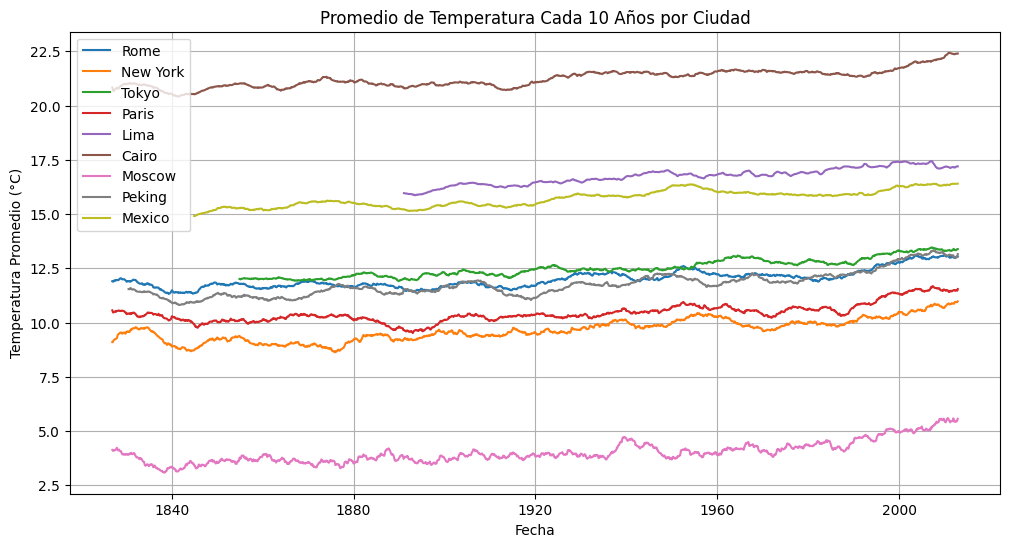

In [41]:
#haremos exactamente lo mismo pero cada 10 años (120 meses)
df['Date'] = pd.to_datetime(df['Date'])

promedios_cada_10_años = {}

for ciudad in ciudades:
  df_ciudad = df[df['City'] == ciudad].sort_values(by='Date').reset_index(drop=True)
  if not df_ciudad.empty:
    promedio_movil_120_meses = df_ciudad['AverageTemperature'].rolling(window=120).mean()
    promedios_cada_10_años[ciudad] = pd.Series(promedio_movil_120_meses.values, index=df_ciudad['Date'])

plt.figure(figsize=(12, 6))


for ciudad, promedio_10_años in promedios_cada_10_años.items():
  plt.plot(promedio_10_años.index, promedio_10_años.values, label=ciudad)

plt.xlabel('Fecha')
plt.ylabel('Temperatura Promedio (°C)')
plt.title('Promedio de Temperatura Cada 10 Años por Ciudad')
plt.legend()
plt.grid(True)
plt.show()

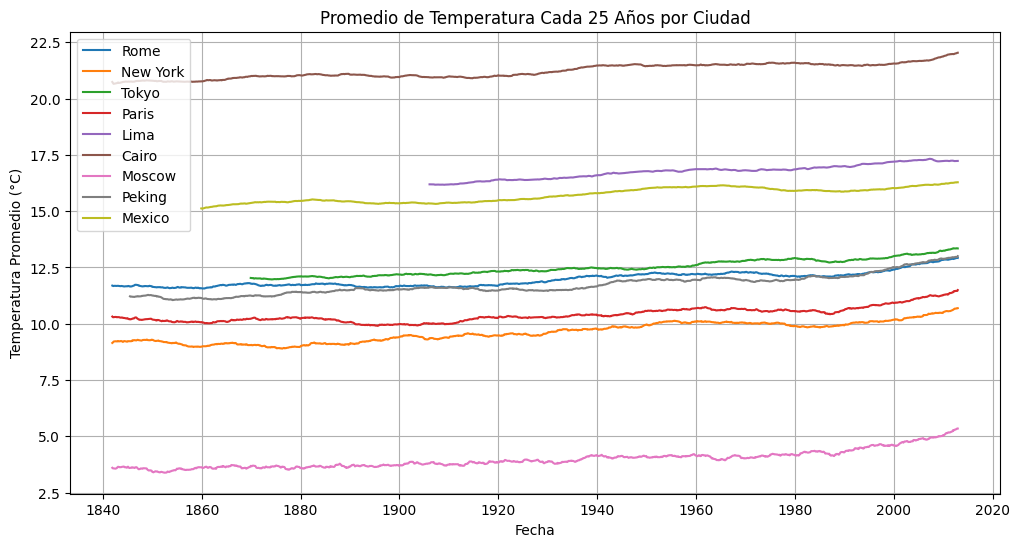

In [42]:
#finalmente cada 25 años (300 meses)


df['Date'] = pd.to_datetime(df['Date'])

promedios_cada_25_años = {}

for ciudad in ciudades:
  df_ciudad = df[df['City'] == ciudad].sort_values(by='Date').reset_index(drop=True)
  if not df_ciudad.empty:
    promedio_movil_300_meses = df_ciudad['AverageTemperature'].rolling(window=300).mean()
    promedios_cada_25_años[ciudad] = pd.Series(promedio_movil_300_meses.values, index=df_ciudad['Date'])

plt.figure(figsize=(12, 6))


for ciudad, promedio_25_años in promedios_cada_25_años.items():
  plt.plot(promedio_25_años.index, promedio_25_años.values, label=ciudad)

plt.xlabel('Fecha')
plt.ylabel('Temperatura Promedio (°C)')
plt.title('Promedio de Temperatura Cada 25 Años por Ciudad')
plt.legend()
plt.grid(True)
plt.show()

Aquí vemo claramente las tendencias a la alta de las temperaturas de cada ciudad. De las que aparecen en la gráfica, Moscú es  la que tiene mayor cambio, vemos que alrededor de 1840, la temperatura promedio era de alrededor de 3 grados. Sin embargo conform nos acercamos al 2012, la temperatura promedio esde casi 6 grados! La tendencia es global, no importa que ciudad nos agarremos, sus promedios han subido considerablemente desde 1840, y vemos que es alrededor de 1950 cuando los cambios se empiezan anotar más.